Slides para entender o conjunto de dados e Python:

*   https://docs.google.com/presentation/d/13nI0kpuaHT1qCNWlWly_8k2kw51m2oDwqJg1k1GAG8Q/edit?usp=sharing


#1 - Importando libs e carregando dataset
---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_spec
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/GustaFreire/datasets/main/heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


#2 - Fazendo uma análise exploratória dos dados
---

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
df.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


Data Visualization

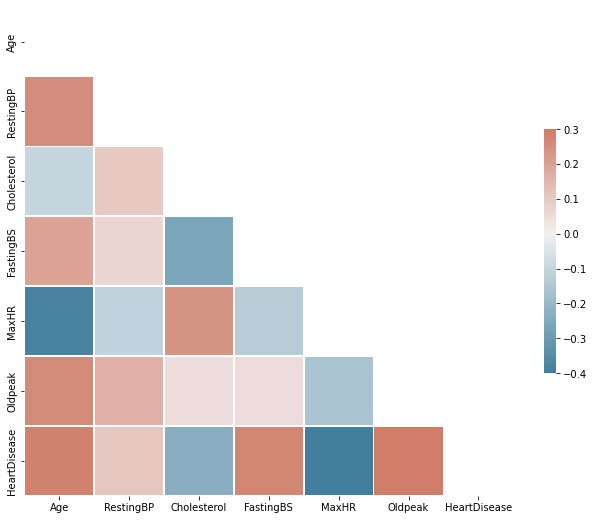

In [ ]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

countplot 

M    725
F    193
Name: Sex, dtype: int64


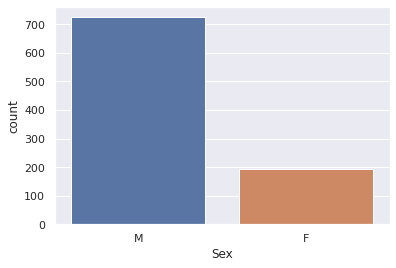

In [ ]:
print(df.Sex.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=df, x="Sex")
plt.show()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64


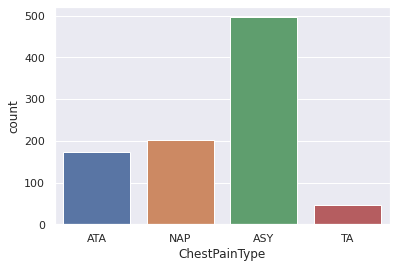

In [ ]:
print(df.ChestPainType.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=df, x="ChestPainType")
plt.show()

histograma

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


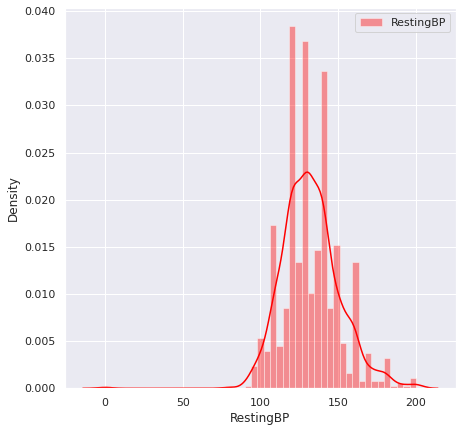

In [ ]:
fig = plt.figure(figsize=(7,7))
sns.distplot(df.RestingBP, color="red", label="RestingBP", kde= True)
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


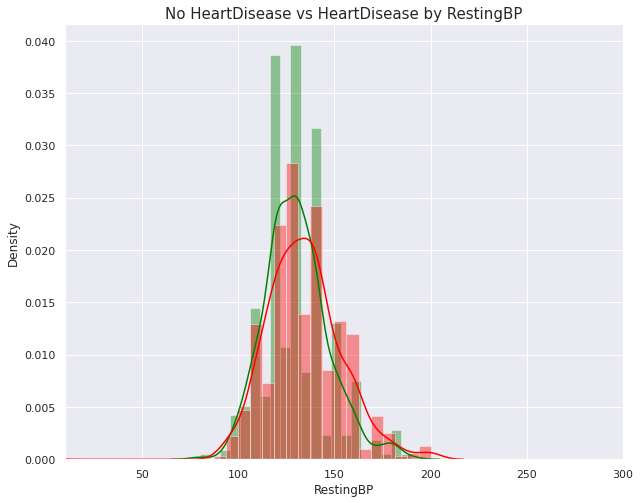

In [ ]:
plt.figure(figsize=(10,8))

sns.distplot(df[df['HeartDisease'] == 0]["RestingBP"], color='green') # No HeartDisease - green
sns.distplot(df[df['HeartDisease'] == 1]["RestingBP"], color='red') # HeartDisease - Red

plt.title('No HeartDisease vs HeartDisease by RestingBP', fontsize=15)
plt.xlim([10,300])
plt.show()

scatterplot

Age vs RestingBP

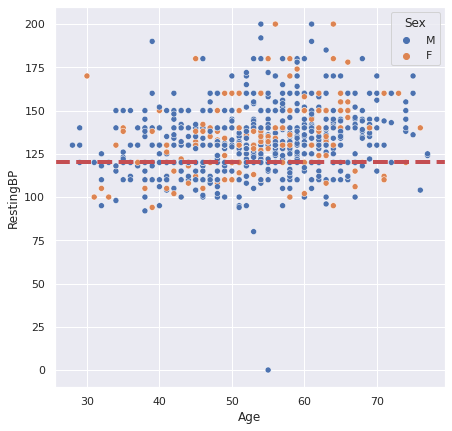

In [ ]:
fig = plt.figure(figsize=(7,7))
graph = sns.scatterplot(data=df, x="Age", y="RestingBP", hue='Sex')
graph.axhline(y= 120, linewidth=4, color='r', linestyle= '--')
plt.show()

Age vs Cholesterol 

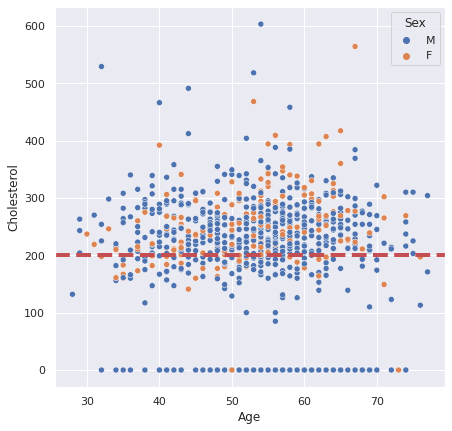

In [ ]:
fig = plt.figure(figsize=(7,7))
graph = sns.scatterplot(data=df, x="Age", y="Cholesterol", hue='Sex')
graph.axhline(y= 200, linewidth=4, color='r', linestyle= '--')
plt.show()

#3 - Pré-processamento dos dados
---

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0




*   Feature é uma característica que descreve um objeto.
Qualquer atributo de um objeto pode ser tratado como feature, seja um número, um texto, uma data, um booleano etc.




*  As features são as entradas dos algoritmos de ML, quanto mais detalhes o algoritmo tiver sobre uma entrada, mais facilmente achará padrões nos dados.  Features ruins podem prejudicar o desempenho do algoritmo. Features boas são a chave para o sucesso de um algoritmo.Boa parte do trabalho em ML é conseguir trabalhar os dados e gerar boas features em cima deles, o que é conhecido como engenharia de features ou feature engineering. 



*   target é o que queremos prever, no nosso caso a coluna HeartDisease é ó nosso target, logo vamos remover do conjunto 

In [ ]:
#definindo nossas features e targets
X = df.drop(["HeartDisease"], axis=1)
y = df[["HeartDisease"]]

In [ ]:
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up


In [ ]:
y.head()

,HeartDisease
0,0
1,1
2,0
3,1
4,0


Etapa seguinte - encoding:


*   Vamos utilizar OneHotEncoder() para codificar as colunas 'ChestPainType', 'RestingECG' e 'ST_Slope'.

*   Vamos utilizar LabelEncoder() para codificar colunas binárias: 'Sex' e 'ExerciseAngina'.



Para entender a diferença: https://contactsunny.medium.com/label-encoder-vs-one-hot-encoder-in-machine-learning-3fc273365621

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
X_encoded = pd.get_dummies(X, columns=['ChestPainType', 'RestingECG', 'ST_Slope'])
X_encoded.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,M,140,289,0,172,N,0.0,0,1,0,0,0,1,0,0,0,1
1,49,F,160,180,0,156,N,1.0,0,0,1,0,0,1,0,0,1,0
2,37,M,130,283,0,98,N,0.0,0,1,0,0,0,0,1,0,0,1
3,48,F,138,214,0,108,Y,1.5,1,0,0,0,0,1,0,0,1,0
4,54,M,150,195,0,122,N,0.0,0,0,1,0,0,1,0,0,0,1


In [ ]:
from sklearn.preprocessing import LabelEncoder

columns = ['Sex', 'ExerciseAngina']

for column in columns:
    le = LabelEncoder()
    le.fit(X_encoded[column])
    X_encoded[column] = le.transform(X_encoded[column])

Masculino' na coluna 'Sexo' foi convertido em 1 e 'Feminino' em 0. Da mesma forma, 'N' na coluna 'ExerciseAngina' foi convertido em 0 e 'Y' em 1.

In [ ]:
X_encoded.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,0,1,0,0,0,1,0,0,0,1
1,49,0,160,180,0,156,0,1.0,0,0,1,0,0,1,0,0,1,0
2,37,1,130,283,0,98,0,0.0,0,1,0,0,0,0,1,0,0,1
3,48,0,138,214,0,108,1,1.5,1,0,0,0,0,1,0,0,1,0
4,54,1,150,195,0,122,0,0.0,0,0,1,0,0,1,0,0,0,1


In [ ]:
print('Shape of X_encoded: ', X_encoded.shape)
print('Shape of y: ', y.shape)

Shape of X_encoded:  (918, 18)
Shape of y:  (918, 1)


Etapa seguinte: dividindo o conjunto de dados em conjuno de treino e conjunto de teste

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size= 0.2, random_state= 0)

In [ ]:
print("Shape do dataset de treino:", X_train.shape)
print("Shape do ytrain:", y_train.shape)
print("Shape do dataset de teste:", X_test.shape)
print("Shape do ytest:", y_test.shape)

Shape do dataset de treino: (734, 18)
Shape do ytrain: (734, 1)
Shape do dataset de teste: (184, 18)
Shape do ytest: (184, 1)


#4 - Aplicação dos modelos e verificando resultados
---

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

1 - K-Nearest-Neighbor (KNN)

Explicação básica: O KNN é um dos muitos algoritmos mais simples do mundo do aprendizado de máquina, utilizado principalmente em tarefas de classificação, e que basicamente se baseia no quão "similar" é um dado (vetor) do outro.

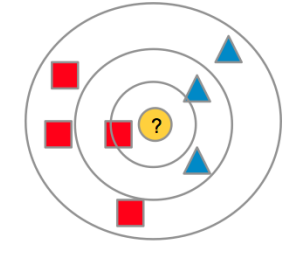

Imagine que nós temos um conjunto de quadrados e triângulos e queremos saber qual dessas duas formas corresponde ao dado de teste desconhecido (em amarelo).

O KNN vai basicamente classficar esse novo dado da seguinte forma:
1.   Medir a distância entre esse novo dado e todos os outros dados 
2.   Selecionar os K vizinhos mais próximos desse novo dado (menores distâncias)
3.   Classifica o novo dado como sendo a classe que mais apareceu dentre esses vizinhos

Curiosidade: o KNN é conhecido como um método de aprendizado lazy (preguiçoso), pois ele gasta mais tempo no momento de fazer uma classificação do que no momento do aprendizado, na verdade o "aprendizado" do KNN nada mais é do que o armazenamento dos dados de treinamento.

artigo: https://medium.com/brasil-ai/knn-k-nearest-neighbors-1-e140c82e9c4e

vídeo: https://www.youtube.com/watch?v=HVXime0nQeI

---

Padronizando os dados para obter um desempenho melhor no modelo (não entraremos em detalhe mas basicamente a padronização busca preparar os dados colocando em uma mesma escala de valores)

artigo sobre padronização e normalização de dados: 
- https://medium.com/ipnet-growth-partner/padronizacao-normalizacao-dados-machine-learning-f8f29246c12

In [ ]:
# scaling dataset with robust scaler
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler.fit(X_encoded)
X_train_std=std_scaler.transform(X_train)
X_test_std=std_scaler.transform(X_test)

X_train = pd.DataFrame(X_train_std, columns=X_encoded.columns)
X_test = pd.DataFrame(X_test_std, columns=X_encoded.columns)

começando o KNN no Python

In [ ]:
#utilzando KNNClassifier no Heart Prediction Dataset
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

knn_train = round(knn.score(X_train, y_train) * 100, 2)
knn_accuracy = round(accuracy_score(y_pred_knn, y_test) * 100, 2)
knn_f1 = round(f1_score(y_pred_knn, y_test) * 100, 2)

print("Training Accuracy     :",knn_train,"%")
print("Model Accuracy Score  :",knn_accuracy,"%")
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_knn))
print("Classification_Report: \n",classification_report(y_test,y_pred_knn))

Training Accuracy     : 91.01 %
Model Accuracy Score  : 84.24 %
Confusion Matrix: 
 [[60 17]
 [12 95]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.83      0.78      0.81        77
           1       0.85      0.89      0.87       107

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.84       184
weighted avg       0.84      0.84      0.84       184



2 - Decision Tree

Explicação básica: árvore de decisão é uma estrutura hierárquica formada por nós (igual a estrutura de dados árvore), onde a decisão é feita partindo do nó raiz até chegar em um nó folha da árvore, sendo que o treinamento é basicamente o algoritmo de construção da nossa árvore

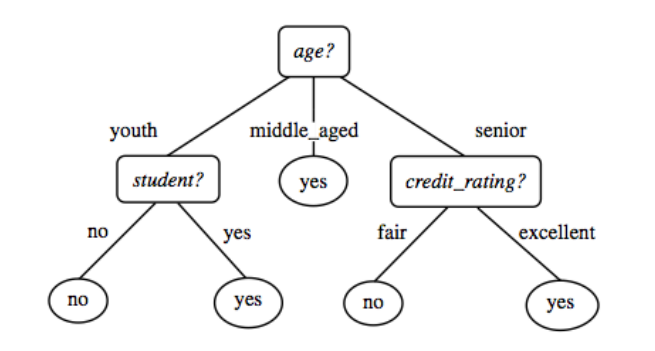

Analogia: você vai fazer uma reunião com seus amigos em sua casa, e vai rolar comidas e bebidas. Você quer jogar um jogo de tabuleiro, mas não sabe qual o melhor para essa situação, portanto, você vai recorrer a árvore de decisão para tomar sua decisão de forma mais correta. Para isso vamos caminhar por ela a partir do nó raiz, que contém a pergunta: Está jogando com crianças? Não, então iremos para nó filho da esquerda. Vamos jogar por mais de duas horas? Acho que sim! Assim, o próximo é: Regras difíceis? Vou tomar uma, logo não vou querer pensar muito rsrs. Reposta é não. Todos os jogadores vão ficar até o final? Vamos supor que sim! Desse modo, chegamos ao nó folha, com jogo Monopoly.

artigo: https://medium.com/machine-learning-beyond-deep-learning/árvores-de-decisão-3f52f6420b69

vídeo: https://www.youtube.com/watch?v=_L39rN6gz7Y

Começando com Decision Tree no Python

In [ ]:
#utilzando DecisionTreeClassifier no Heart Prediction Dataset
from sklearn.tree import DecisionTreeClassifier

In [ ]:
decision = DecisionTreeClassifier()
decision.fit(X_train, y_train)
y_pred_Decision = decision.predict(X_test)

decision_train = round(decision.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(y_pred_Decision, y_test) * 100, 2)
decision_f1 = round(f1_score(y_pred_Decision, y_test) * 100, 2)

print("Training Accuracy     :",decision_train,"%")
print("Model Accuracy Score  :",decision_accuracy,"%")
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_Decision))
print("Classification_Report: \n",classification_report(y_test,y_pred_Decision))

Training Accuracy     : 100.0 %
Model Accuracy Score  : 76.09 %
Confusion Matrix: 
 [[64 13]
 [31 76]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.67      0.83      0.74        77
           1       0.85      0.71      0.78       107

    accuracy                           0.76       184
   macro avg       0.76      0.77      0.76       184
weighted avg       0.78      0.76      0.76       184



Obs: pra quem já conheçe ou já ouviu falar, ainda vamos ver o modelo que é basicamente várias árvores de decisão juntas: Random Forest!

(bônus) Métricas de Avaliação em Machine Learning: 
- https://medium.com/kunumi/métricas-de-avaliação-em-machine-learning-classificação-49340dcdb198